# Evaluate Datasets

In [1]:
import torch
from glob import glob
import textgrid
from tqdm import tqdm
from utils.misc import plot_specgram
from supervoice.audio import load_mono_audio
from IPython.display import Audio, display
import matplotlib.pyplot as plt
import math
from train_config import config

In [2]:
def load_dataset(name):
    dataset_dir = "datasets/" + name + "-aligned"
    dataset_audio_dir = "datasets/" + name + "-prepared"
    files = glob(dataset_dir + "/**/*.TextGrid")
    files = [f[len("datasets/" + name + "-aligned/"):-len(".TextGrid")] for f in files]
    files.sort()
    return files

prepared_dataset_name = "libritts"
files = load_dataset(prepared_dataset_name)

In [6]:
phoneme_duration = config.audio.hop_size / config.audio.sample_rate

def plot_alignments(spec, tg):

    # Draw spec
    _, ax = plt.subplots(1, 1, figsize=(20, 10))
    ax.imshow(spec, vmin=-10, vmax=0, origin="lower", aspect="auto")    

    # Draw annotations
    for span in tg[0]:
        span_start = math.floor(span.minTime / phoneme_duration)
        span_end = math.floor(span.maxTime / phoneme_duration)
        ax.axvspan(span_start, span_end, facecolor="None", edgecolor="white")
        ax.annotate(span.mark, (span_start, 75), annotation_clip=True, color="white")
    for span in tg[1]:
        span_start = math.floor(span.minTime / phoneme_duration)
        span_end = math.floor(span.maxTime / phoneme_duration)
        ax.annotate(span.mark, (span_start, 70), annotation_clip=True, color="white")
    
def show_file(dataset, file):

    # Load Text Grid
    tg = textgrid.TextGrid.fromFile("datasets/" + dataset + "-aligned/" + file + ".TextGrid")

    # Load spectogram
    spec = torch.load("datasets/" + dataset + "-prepared/" + file + ".pt", map_location="cpu")

    # Plot alignments
    plot_alignments(spec, tg)

    # Show audio
    waveform = load_mono_audio("datasets/" + dataset + "-prepared/" + file + ".wav", sample_rate = config.audio.sample_rate)
    display(Audio(data=waveform, rate=config.audio.sample_rate))

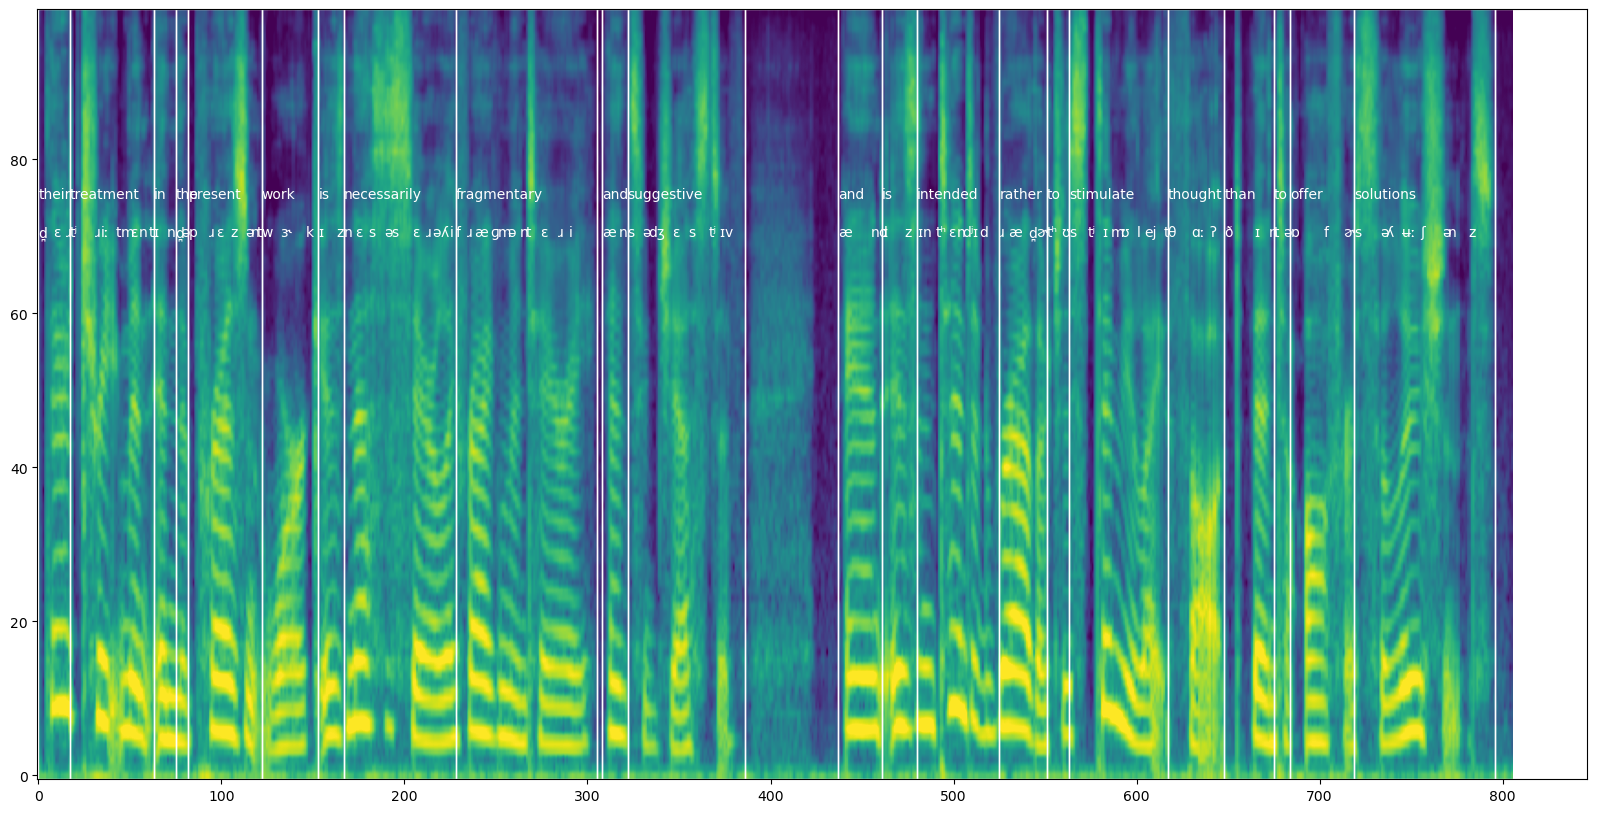

In [7]:
show_file(prepared_dataset_name, files[21338])